
# Project: Investigate TMBD Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The Movies making industry is one of the biggest right now, billions of people watch new movies in theatre, streaming services everyday. Movie Makers needs to know what the fans like now adays cause people's taste has changed signfically over the years, now i'll try to discover some insights from this dataset which contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. Dealing with such data makes me ask myself some questons like What genre is popular each deacde? Are Budget and Revenue correlated? What Genre has the most movies made? Are runtime and popularity correlated? all these questions will help us discover intersting patterens. 

## First things first, let's import libraries we'll need

In [102]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

### General Properties
Import the data from the CSV file

In [103]:
#read the data from the CSV file
movies_df= pd.read_csv('tmdb-movies.csv')
#displays the first 5 rows in the dataframe
movies_df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47


In [104]:
#gets dimensions of the dataframe
movies_df.shape

(10866, 21)

In [105]:
#displays info of the dataframe
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

**As seen above the dataset consists of 10866 entries (movies), each with specific properties (21 columns) like Movie Budget, Revenue, cast, director .. etc**

**The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time**

### Data Cleaning:
First of all let's see if there are any duplicates in the dataset

In [106]:
#gets number of duplicate entries
sum(movies_df.duplicated())

1

There is indeed a duplicate Entry, let's remove it and check if it's removed

In [107]:
#drop duplicates
movies_df.drop_duplicates(subset=None, keep='first', inplace=True)
#gets the dimensions of the dataframe
movies_df.shape

(10865, 21)

now we have no duplicate, let's further clean this data by dropping unnecceassry columns like:

**Overview,id,imdb_id,tagline,keywords,cast, director,homepage, production_company** --> won't be very useful in finding patterns as they're extremely unique

**release_date** --> release year will just as useful

**budget and revenue** --> i'll be using the other budget and revenue columns as they will give a fairly comparison 

Also i'll rename the last two columns to make it easier to use them

In [108]:
#drop unneccessary columns
movies_df.drop(['overview','budget','revenue','id','imdb_id','keywords','tagline','cast','director','homepage','release_date','production_companies'], axis=1, inplace= True)
#rename the columns
movies_df.rename(columns = {'budget_adj':'budget', 'revenue_adj':'revenue'}, inplace=True)
#displays dataframe info
movies_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 9 columns):
popularity        10865 non-null float64
original_title    10865 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget            10865 non-null float64
revenue           10865 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 848.8+ KB


now let's check for Null values in our data

In [109]:
#check for number of Nan values in each column
movies_df.isnull().sum()

popularity         0
original_title     0
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
budget             0
revenue            0
dtype: int64

now we drop these columns

In [110]:
#drop rows with NaN values
movies_df.dropna(inplace = True)
#check if they're dropped
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 9 columns):
popularity        10842 non-null float64
original_title    10842 non-null object
runtime           10842 non-null int64
genres            10842 non-null object
vote_count        10842 non-null int64
vote_average      10842 non-null float64
release_year      10842 non-null int64
budget            10842 non-null float64
revenue           10842 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 847.0+ KB


***We have some Numerical columns like revenue and budget, let's check if there's unusual values***

In [111]:
# turn off scientific notation in pandas
pd.set_option('display.float_format', lambda x: '%.2f' % x)
movies_df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget,revenue
count,10842.00,10842.00,10842.00,10842.00,10842.00,10842.00,10842.00
mean,0.65,102.14,217.82,5.97,2001.31,17587121.44,51477974.92
std,1.00,31.29,576.18,0.93,12.81,34334366.97,144772307.64
min,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,0.21,90.00,17.00,5.40,1995.00,0.00,0.00
50%,0.38,99.00,38.00,6.00,2006.00,0.00,0.00
75%,0.72,111.00,146.00,6.60,2011.00,20925067.04,33878383.70
max,32.99,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


Some Columns have zero values like Budget, Revenue, runtime and popularity. which means these entries are inaccurate, let's handle these rows

In [112]:
#count movies with zero budget or zero revenue
len(movies_df[(movies_df['budget'] == 0) | (movies_df['revenue'] == 0)])

6988

Since that's a lot of movies and deleting them would probably affect other investigations non related to budget and revenue so i'll just create a separate dataframe for movies with budget and revenue values more than zero

In [113]:
#create a dataframe for movies that dont zero budget or zero revenue
BudgetRevenue = movies_df[(movies_df.budget!=0)&(movies_df.revenue!=0)]
#check for dataframe 
BudgetRevenue.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget,revenue
count,3854.00,3854.00,3854.00,3854.00,3854.00,3854.00,3854.00
mean,1.19,109.22,527.72,6.17,2001.26,44239993.08,137064690.30
std,1.48,19.92,879.96,0.79,11.28,44809254.03,216111351.44
min,0.00,15.00,10.00,2.20,1960.00,0.97,2.37
25%,0.46,95.00,71.00,5.70,1995.00,13090528.47,18357350.36
50%,0.80,106.00,204.00,6.20,2004.00,30016111.91,61730679.08
75%,1.37,119.00,580.00,6.70,2010.00,60613069.68,163257654.56
max,32.99,338.00,9767.00,8.40,2015.00,425000000.00,2827123750.41


Now let's see if there are movies with zero minutes runtime

In [114]:
#count movies with zero minutes runtime
len(movies_df[movies_df.runtime ==0])

30

now we delete these movies

In [115]:
#drop movies with zero minutes runtime
movies_df = movies_df[movies_df.runtime != 0]
#check dataframe for changes
movies_df.shape

(10812, 9)

**Now each movie has multiple genres, let's split these genres into separate entries**

In [116]:
#create a new dataframe for genres by splitting each genre in the original dataset and turn it to its own entry
#first we dropped the 'genres' column
#then we rejoined after splitting each genre and resetting the index
genres_df = movies_df.drop('genres', axis=1).join(movies_df['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genres'))
#display the first 5 cells of the new dataframe
genres_df.head()

,popularity,original_title,runtime,vote_count,vote_average,release_year,budget,revenue,genres
0,32.99,Jurassic World,124,5562,6.50,2015,137999939.28,1392445892.52,Action
0,32.99,Jurassic World,124,5562,6.50,2015,137999939.28,1392445892.52,Adventure
0,32.99,Jurassic World,124,5562,6.50,2015,137999939.28,1392445892.52,Science Fiction
0,32.99,Jurassic World,124,5562,6.50,2015,137999939.28,1392445892.52,Thriller
1,28.42,Mad Max: Fury Road,120,6185,7.10,2015,137999939.28,348161292.49,Action


#### Now we have a seprate dataframe to easier analyze movies with respect to its genre

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (which genre is more popular each decade?)

In [117]:
# turn off scientific notation in pandas
pd.set_option('display.float_format', lambda x: '%.2f' % x)
#gets statistics of the genres dataframe
genres_df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget,revenue
count,26894.00,26894.00,26894.00,26894.00,26894.00,26894.00,26894.00
mean,0.71,103.03,250.52,5.96,2000.68,21086406.28,61027967.77
std,1.12,30.01,638.65,0.91,12.77,38230833.34,161687495.48
min,0.00,2.00,10.00,1.50,1960.00,0.00,0.00
25%,0.23,90.00,18.00,5.40,1994.00,0.00,0.00
50%,0.41,100.00,44.00,6.00,2005.00,908.26,0.00
75%,0.78,112.00,174.00,6.60,2011.00,27115708.83,43956661.16
max,32.99,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


We can see that the earliest year is 1960 and the most recent year is 2015 so we have 6 decades to analyse

In [118]:
#calculate the number of genres
len(genres_df.genres.value_counts())

20

and we have a total of 20 genres, let's create a dataframe for each decade

In [119]:
#create a seprate dataframe for each decade,extracted from the genres dataframe using the 'release_year' column
df10s = genres_df.loc[genres_df['release_year']> 2009 ]
df00s = genres_df.loc[(genres_df['release_year']> 1999) & (genres_df['release_year'] < 2010) ]
df90s = genres_df.loc[(genres_df['release_year']> 1989) & (genres_df['release_year'] < 2000 )]
df80s = genres_df.loc[(genres_df['release_year']> 1979) & (genres_df['release_year'] < 1990) ]
df70s = genres_df.loc[(genres_df['release_year']> 1969) & (genres_df['release_year'] < 1980 )]
df60s = genres_df.loc[genres_df['release_year']< 1970 ]

In [120]:
#create a function to plot top 10 genres in each decade
def genresDecade(df, decade):
    #group the dataframe by 'genre' and calculate the popularity mean rounded to 2 decimals
    #then sorts the data decendingly, displaying only the first 10 cells
    df = df.groupby('genres').popularity.mean().round(2).sort_values(ascending = False).iloc[:10]
    #create a bar plot and format it
    df.plot(kind='barh', figsize=[8, 4])
    #plot title and its format
    plt.title(f'The top 10 genres in the {decade}', fontsize = 12) 
    #x-axis label and its format
    plt.xlabel('popularity mean', fontsize = 10)
    #y-axis label and its format
    plt.ylabel('movie genre', fontsize = 10)
    plt.show()

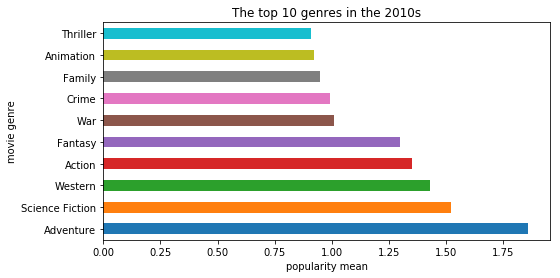

In [121]:
#calls the plot function for the 10s decade
genresDecade(df10s, '2010s')

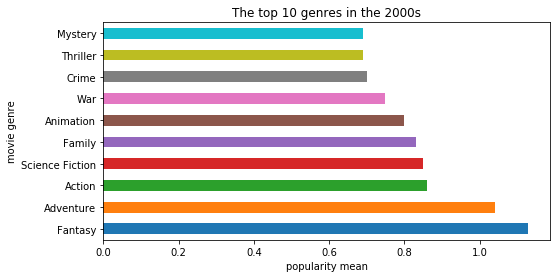

In [122]:
#calls the plot function for the 00s decade
genresDecade(df00s, '2000s')

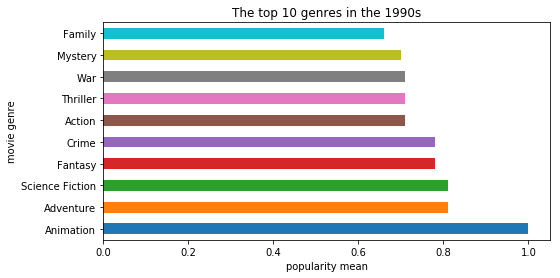

In [123]:
#calls the plot function for the 90s decade
genresDecade(df90s, '1990s')

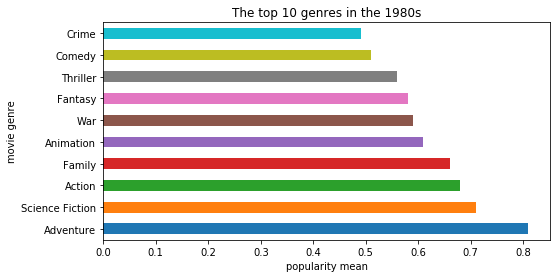

In [124]:
#calls the plot function for the 80s decade
genresDecade(df80s, '1980s')

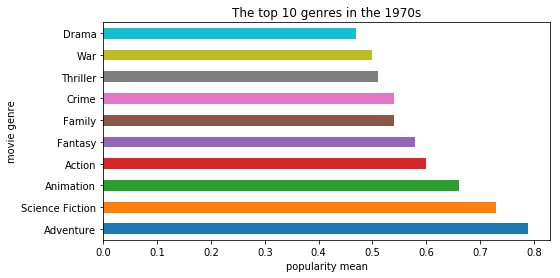

In [125]:
#calls the plot function for the 70s decade
genresDecade(df70s, '1970s')

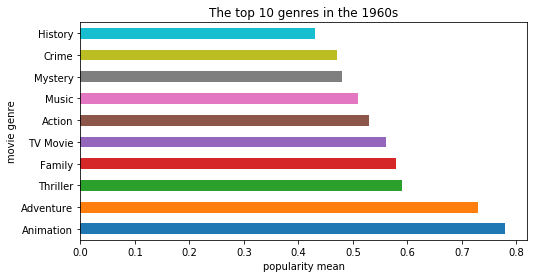

In [126]:
#calls the plot function for the 60s decade
genresDecade(df60s, '1960s')

### As we can see that the adventure genre is holding its place as a fan favorite through the decades, followed by animation and science fiction, meanwhile genres like Thriller that was once pretty popular in the 1960s couldn't keep its place as it's the least popular genre in the 2010s!

### Research Question 2  (Are Budget and Revenue correlated?)
I've Noticed that lots of movies especially in the recent years has a very great budget, which led me to ask, Does having a large budget necessarily mean the revenue would be large as well? lets's see the number of movies which have a budgets equal to or over $100 million first:

In [127]:
#calculates the number of movies with budget equal to or over $100M
len(movies_df[movies_df.budget>=100000000].budget.value_counts())

278

we have a total of 278 movies that has a budget equal to or over $100M, now let's create a histogram to see the distribution

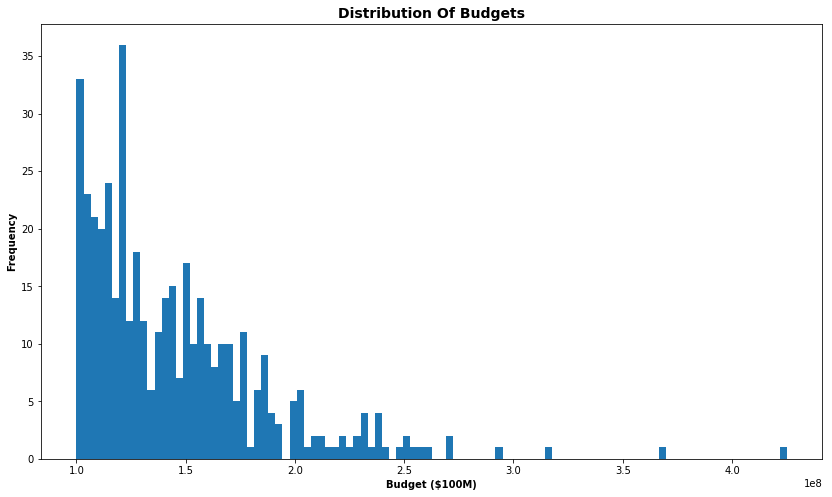

In [128]:
#create a histogram for movies with budget equal to or over $100M
movies_df[movies_df.budget>=100000000].budget.hist(figsize=[14,8],bins=100,grid=False)
#histogram title and its format
plt.title('Distribution of Budgets'.title(),fontsize=14, weight="bold")
#x-axis label and its format
plt.xlabel('Budget ($100M)'.title(),fontsize=10, weight="bold")
#y-axis label and its format
plt.ylabel('Frequency'.title(),fontsize=10, weight="bold");

As shown there are movies that has a budget even more than $300 million! which takes me back to the original question, does having a large budget means the revenue will be large?
Now let's create a scatter plot to find out!

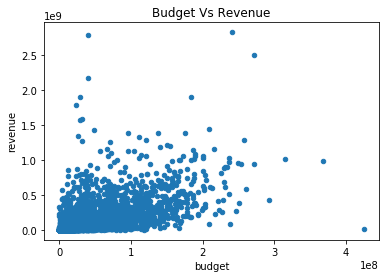

In [129]:
#creating a scatter plot from the movies dataframe, having the x axis label is 'budget', y-axis label is 'revenue'
BudgetRevenue.plot(x='budget',y='revenue',kind='scatter')
#plot title
plt.title('Budget Vs Revenue')
plt.show()


In [130]:
#calculate the correlation coeffient 
BudgetRevenue['budget'].corr(BudgetRevenue['revenue'])

0.57045101958124045

##### As shown not always budget and revenue are correlated. Some movies that has a very large budget gained so little revenue and vice versa!

### Research question 3 (What Genre has the most movies of all time?)

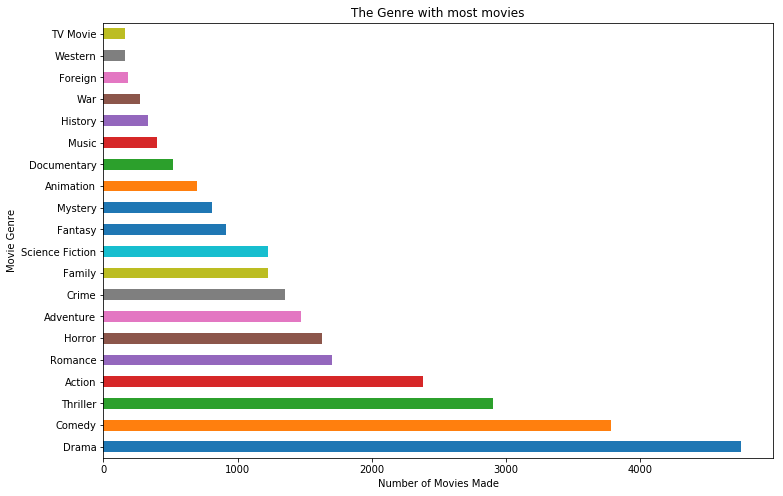

In [131]:
#create a bar chart for counting the movies for each genre, using horizontal bars for easier reading 
genres_df['genres'].value_counts().plot(kind='barh', figsize=(12,8))
#assigning title to the plot
plt.title("The Genre with most movies", fontsize = 12) 
#assinging label to x-axis
plt.xlabel('Number of Movies Made', fontsize = 10)
#assinging label to y-axis
plt.ylabel('Movie Genre', fontsize = 10);

##### Although they're not one of the popular genres, but Drama & comedy has the most movies 

### Research Question 4 (Is runtime correlated with popularity?)

Which is more popular, a very long Movie? or a short one? let's see first our range of time

In [132]:
# turn off scientific notation in pandas
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# get statistics of the 'runtime' column 
movies_df.runtime.describe()

count   10812.00
mean      102.42
std        30.87
min         2.00
25%        90.00
50%        99.00
75%       112.00
max       900.00
Name: runtime, dtype: float64

As seen there is a movie that was 15 hour long! Now let's see the relation between runtime and popularity

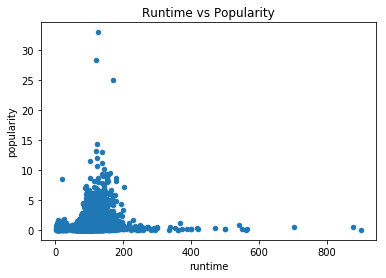

In [133]:
#creating a scatter plot from the movies dataframe, having the x axis label is 'runtime', y-axis label is 'popularity'
movies_df.plot(x='runtime',y='popularity',kind='scatter')
#plot title
plt.title('Runtime vs Popularity')
plt.show()

##### It seems that the 15 hours long movie has a little to no popularity! niether has his long runtime peers. People prefer movies less than 3 hours.



<a id='conclusions'></a>
## Conclusions

> **Results:** The data suggests that <br>
  1- During the last 6 decades we had 20 genres of movies <br>
  2- The Adventure Genre is the most popular one over the decades <br> 
  3- Genres like thriller was pretty popular during the 60s but not right now <br>
  4- Similarly the Science Fiction wasn't even in the top 10 during the 60s but it ranked at #2 in the 2010s <br>
  5- The budget and revenue aren't entirely correlated <br>
  6- Drama movies were made more than any other genre <br>
  7- Movies with very long runtime (over 2 hours) aren't very popular <br>

> **Limitaions:** There were a couple of problems: <br>
  1- The data as big as it was, still is a sample so it won't lead to very accurate results<br>
  2- The data came with Null values that had to be dropped in the cleaning stage<br>
  3- There was so many movies with either zero budget or zero revenue, deleting them would make us lose a lot of other data 
  so a new dataframe was created for when analysing budget and revenue <br>
  4- there were movies that has ero runtime, there were deleted
  5- in the original dataset, each movie genres were compressed into one cell, they were seprated into other dataframe to avoid   duplicates in the original dataset 




In [134]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0